In [2]:
def compute_loss(y, y_hat): 
    return ((y - y_hat) ** 2) / 2

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [61]:
from sklearn.datasets import load_boston 
boston = load_boston() 
X = boston.data 
y = boston.target 
y_hat = np.array([y.mean()]*len(y)) 
compute_loss(y, y_hat).mean() 


42.20977807808278

In [5]:
compute_loss(y[0], y_hat[0]) 

1.076328641284812

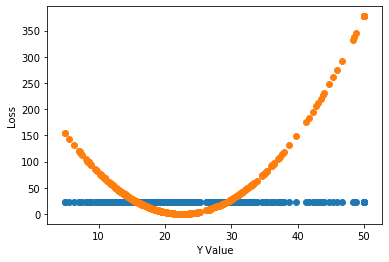

In [6]:
plt.scatter(y, y_hat)
plt.scatter(y, compute_loss(y, y_hat))
plt.xlabel('Y Value') 
plt.ylabel('Loss') 
plt.show()

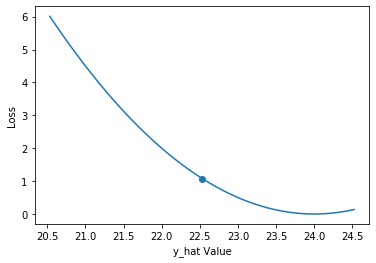

In [7]:
losses = [] 
for i in range(-200, 200): 
    losses.append(compute_loss(y[0], y_hat[0]+i/100))
plt.plot(y_hat[0] + np.arange(-2, 2, .01), losses, zorder=1) 
plt.scatter(y_hat[0], compute_loss(y[0], y_hat[0]), zorder=2)
plt.xlabel('y_hat Value') 
plt.ylabel('Loss') 
plt.show()

In [91]:
def gradient_boost_mse(X, y, M): 
    y_hat = np.array([y.mean()]*len(y)) 
    print(compute_loss(y, y_hat).mean()) 
    for i in range(M): 
        # Calculate pseudo-residuals 
        residuals = -loss_gradient(y, y_hat) 
        # Train a decision tree on the residuals 
        regressor = DecisionTreeRegressor(max_depth=1) 
        regressor.fit(X, residuals) 
        # Add the predictions to y_hat 
        predictions = regressor.predict(X) 
        y_hat = y_hat + predictions 
        # Check the loss 
        plt.scatter(X,y)
        plt.scatter(X,y_hat)
        plt.show()
        #print('y_hat',np.unique(y_hat))
        print(compute_loss(y, y_hat).mean())

887.330485102839


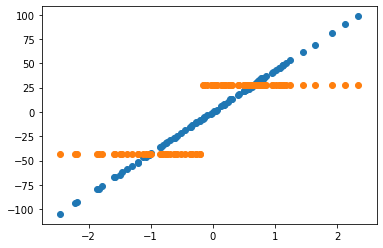

278.3414438474984


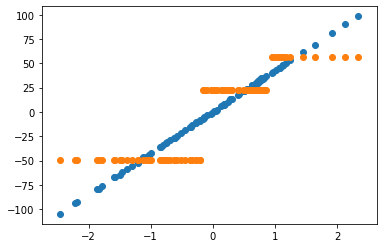

199.60487833110344


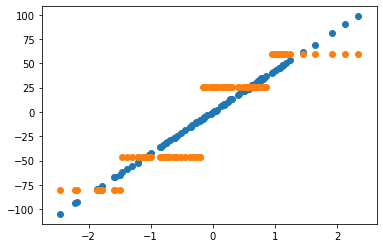

151.12455200691616


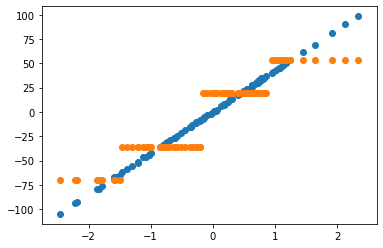

117.14970058118445


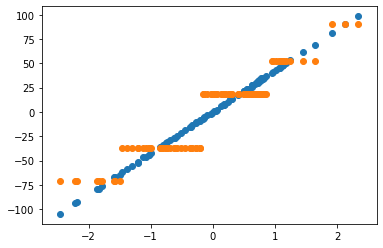

96.63580524774925


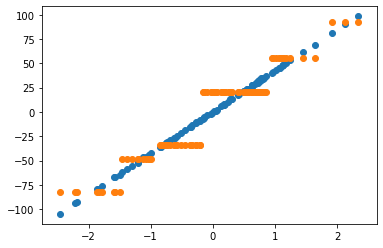

80.80832649512928


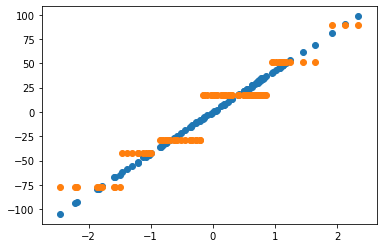

71.29253015964647


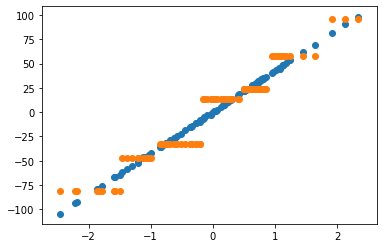

57.26058815821242


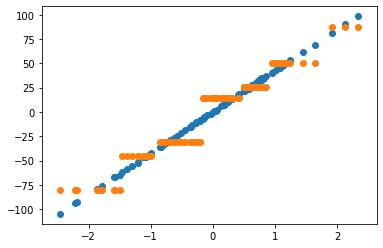

50.822923961749346


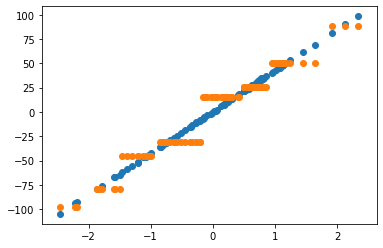

46.184970101995766


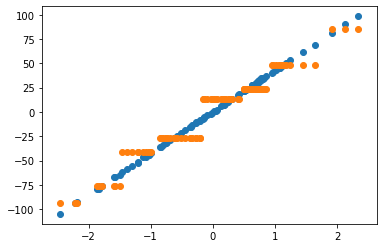

41.93509091459489


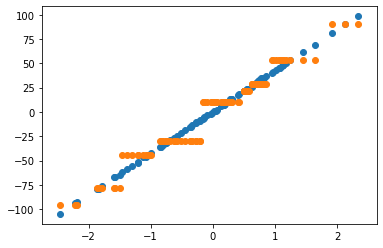

35.42131938981489


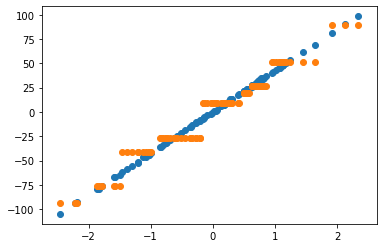

33.36467403057352


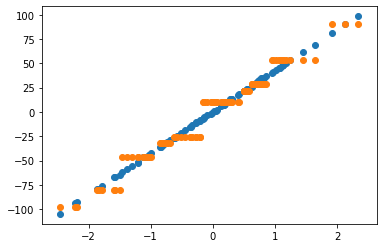

29.64845601011504


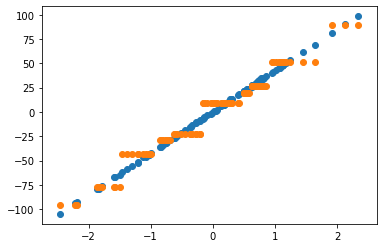

27.5181062771922


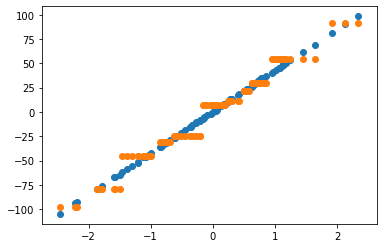

25.1386885094976


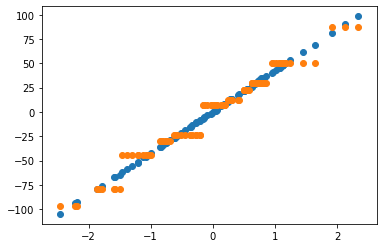

23.606696255155384


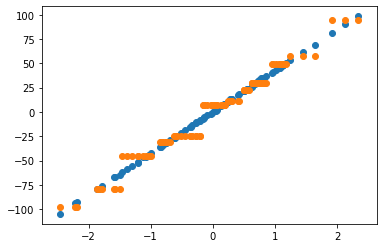

22.00345368523637


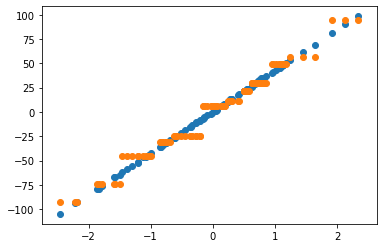

20.821544368941307


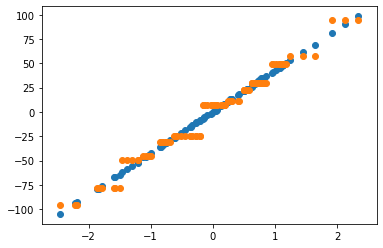

19.69385244876614


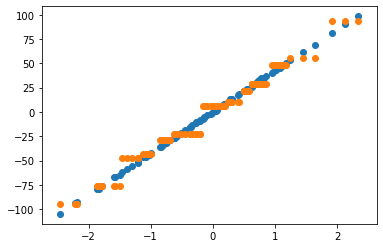

18.537535684180458


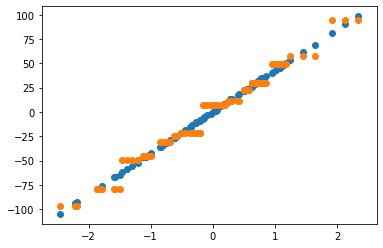

17.14566591228667


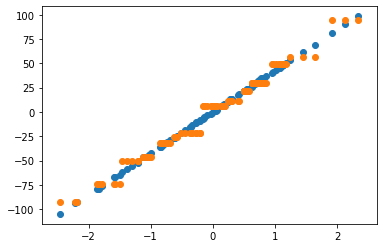

16.19251784612734


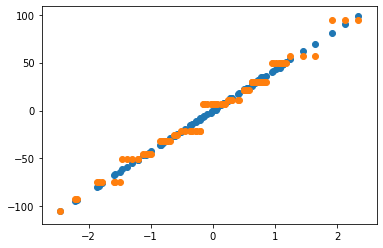

15.410094393143947


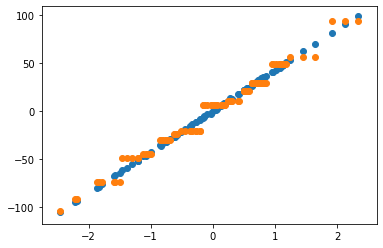

14.941581728691235


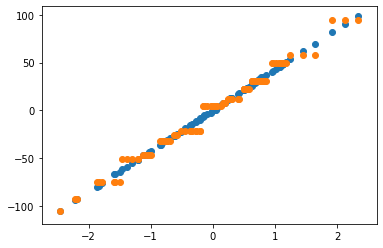

13.805781747215462


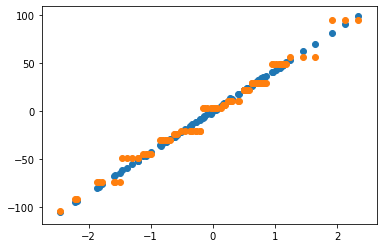

13.051634985321598


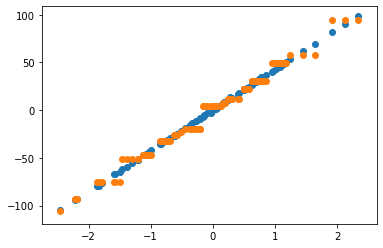

12.208178599129733


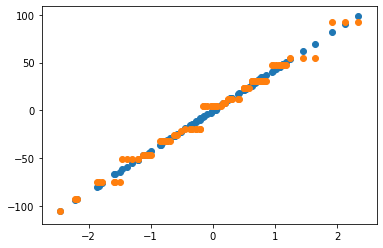

11.542476672058838


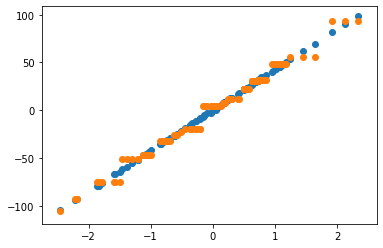

11.25232699690465


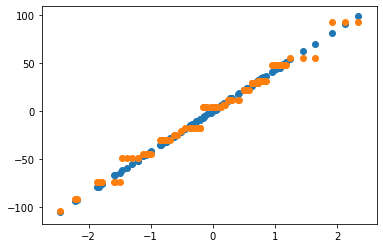

10.705965842566052


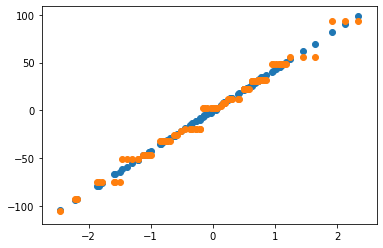

10.140322802584027


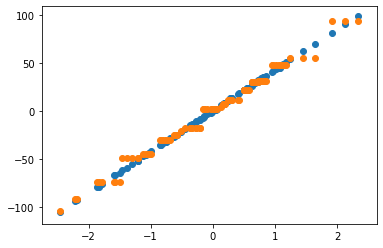

9.74938077014621


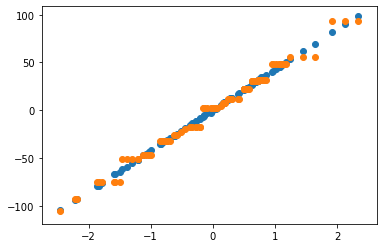

9.33009117712538


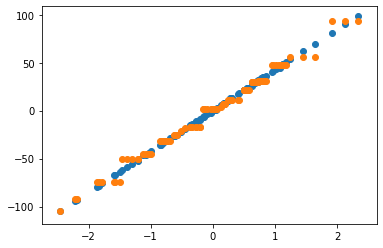

9.022740071943824


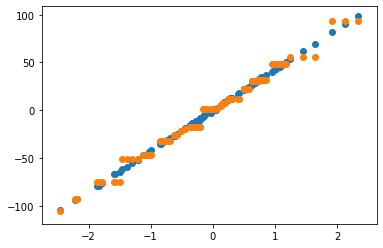

8.741660386931105


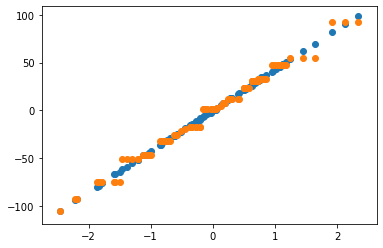

8.536380562088162


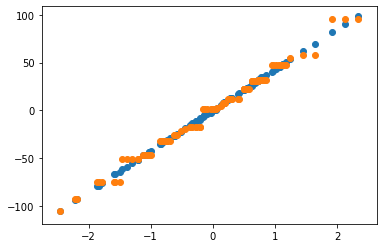

8.286765162239544


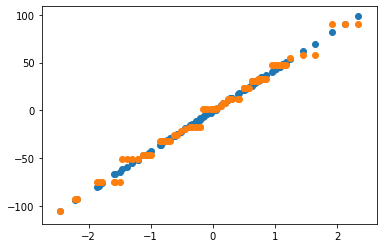

7.862939021517089


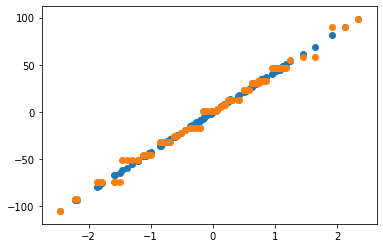

7.5113165300895055


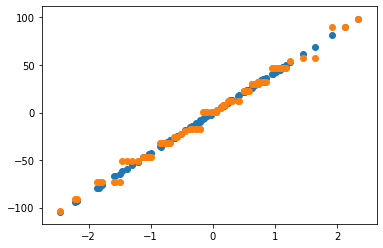

7.382602011713447


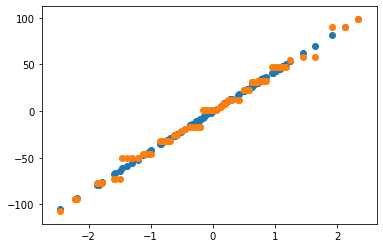

6.97701388106217


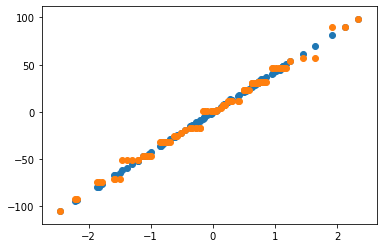

6.7152513286560245


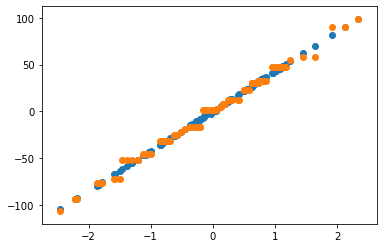

6.432186539871768


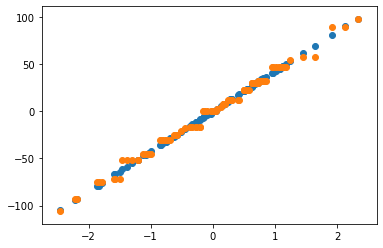

6.209651721503959


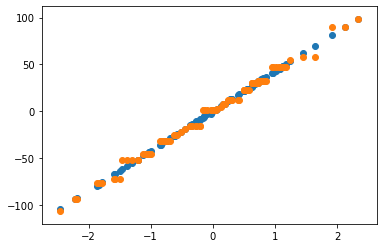

6.021214540768543


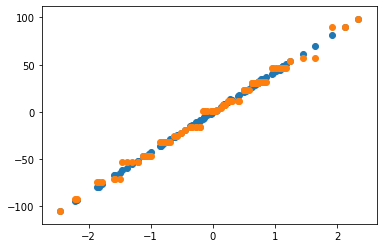

5.837287138101881


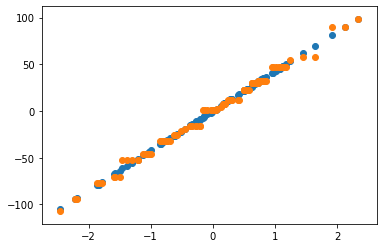

5.668348185839757


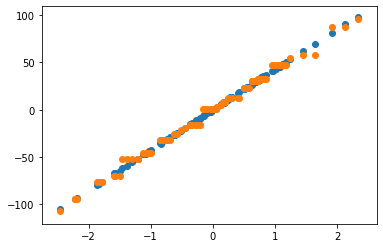

5.554405818636885


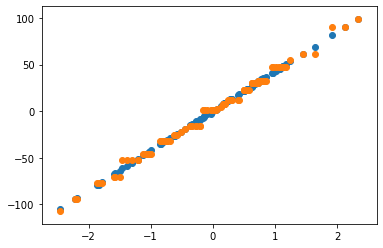

5.304640596393946


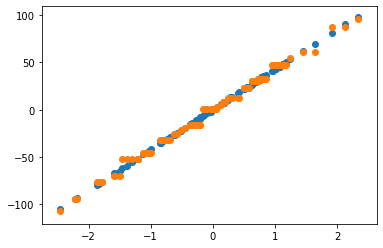

5.157871342086238


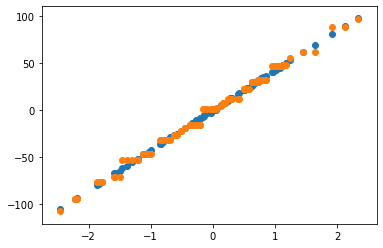

5.0323253803490005


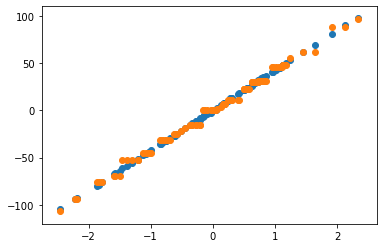

4.860077303004253


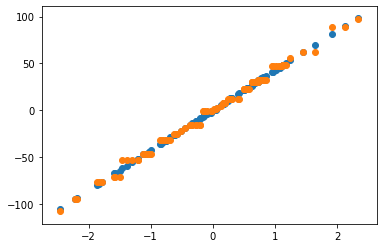

4.6998119579772535


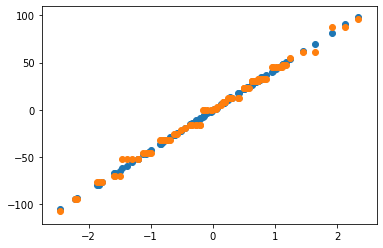

4.548057259970928


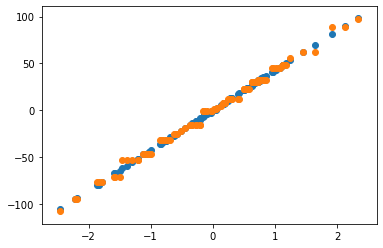

4.451453461278791


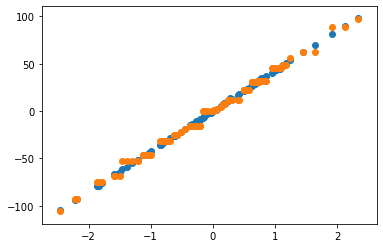

4.34921130380803


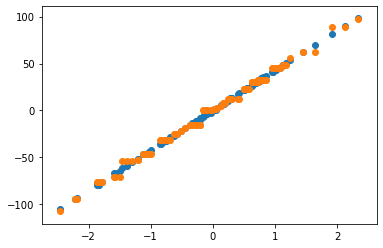

4.204166909428921


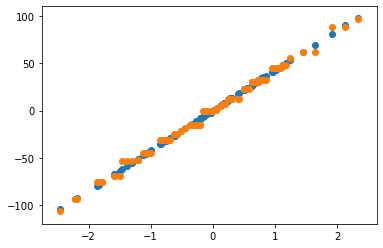

4.0765656103887515


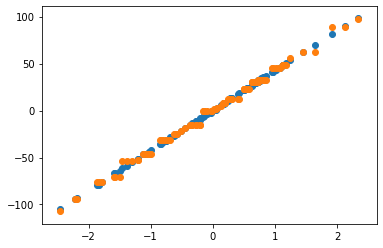

3.9715084656962487


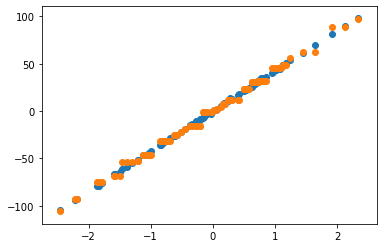

3.883985387823133


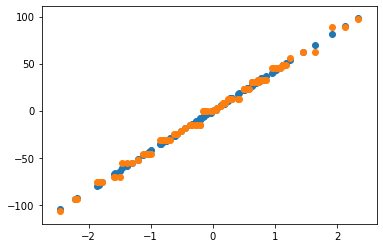

3.802525530472364


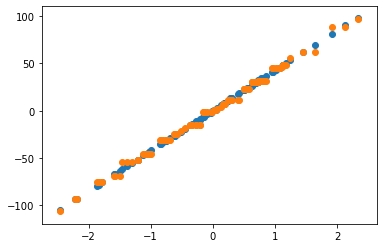

3.7112887161939394


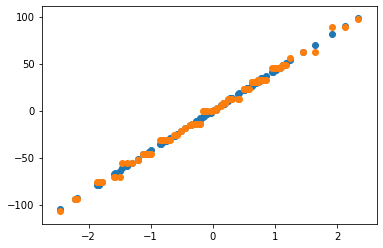

3.613560656359976


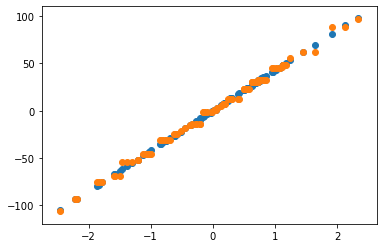

3.535025067035432


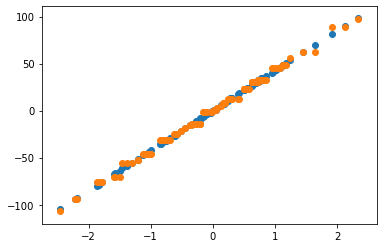

3.467088334266675


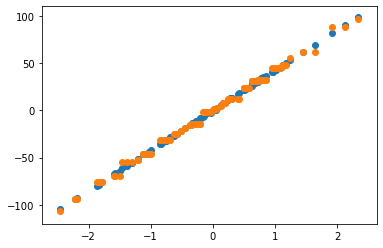

3.3930012773032674


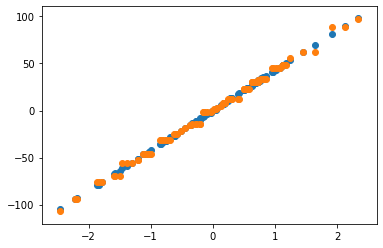

3.322383377893908


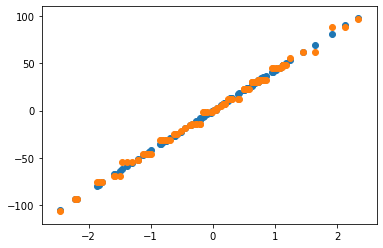

3.257032048496465


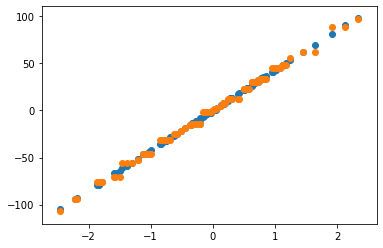

3.193919787790252


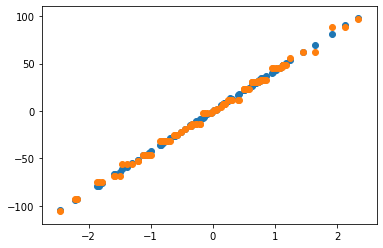

3.125373189855855


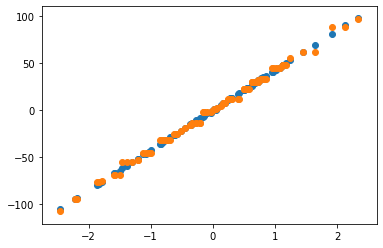

3.05473782654286


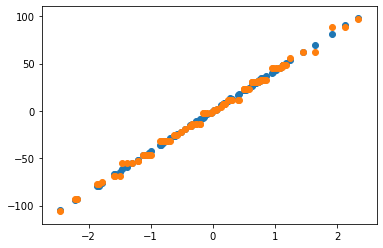

3.01490925798519


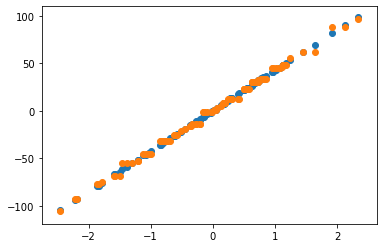

2.9835211822483827


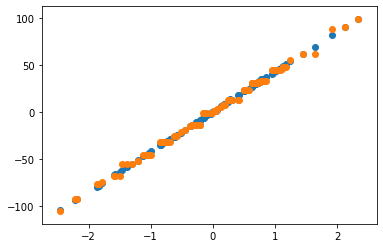

2.935051141895911


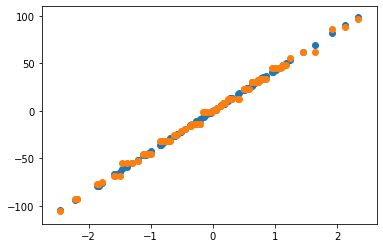

2.862872050192625


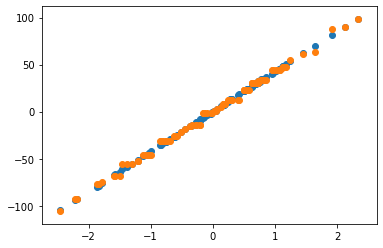

2.789340970154404


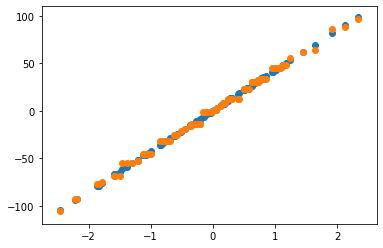

2.7347611994043834


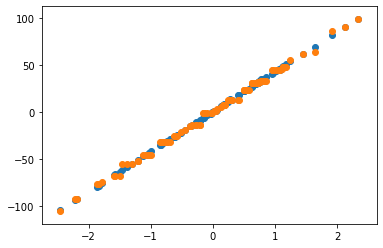

2.6871328191648005


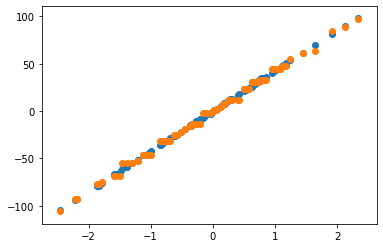

2.6557045682584093


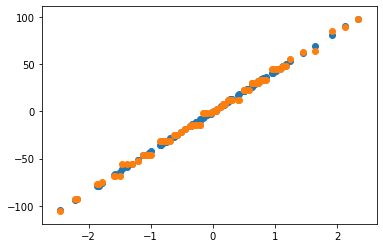

2.613255499536167


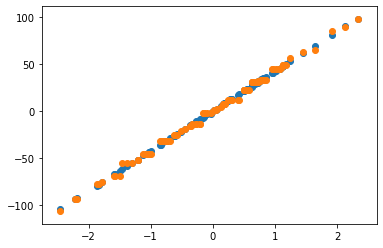

2.5862039221565105


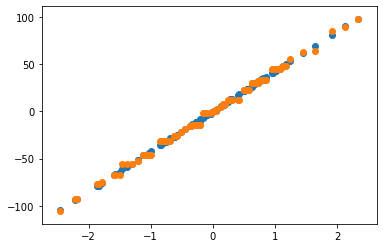

2.541093822908494


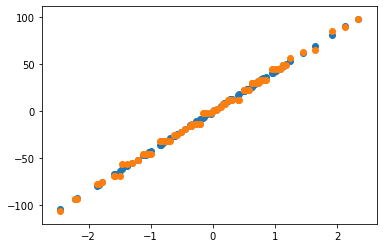

2.495059286614213


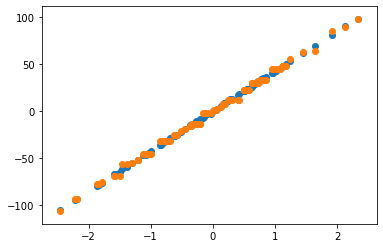

2.4500435593742007


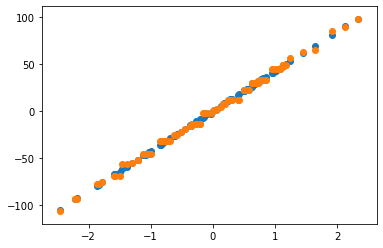

2.4065706804846116


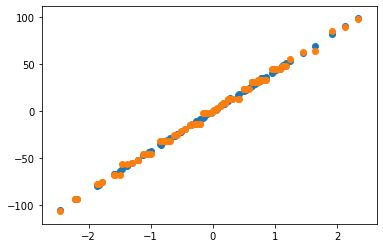

2.370125992724455


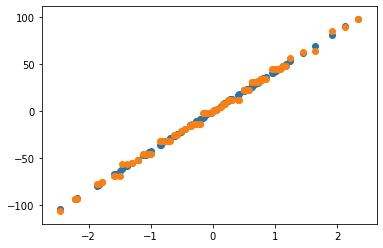

2.3403874054697855


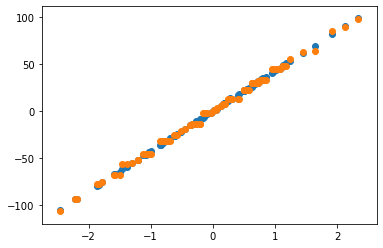

2.3002022672945985


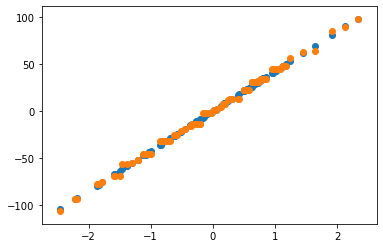

2.264596638765971


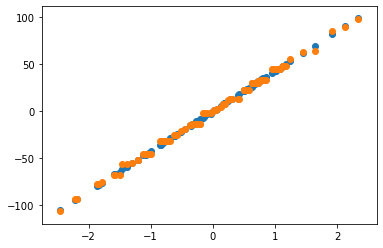

2.2237878902821095


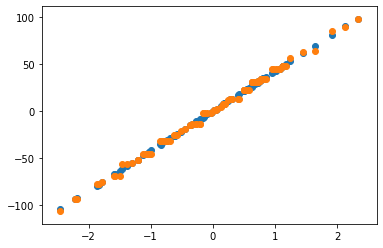

2.181178838984995


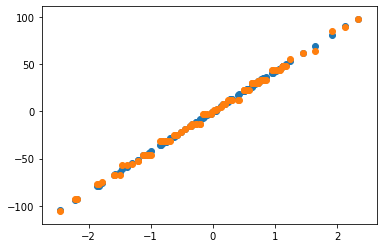

2.1397464961587698


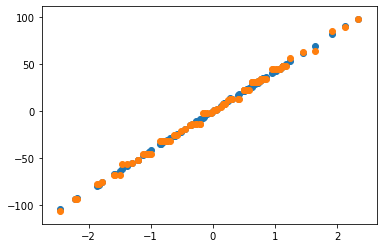

2.1106328860057957


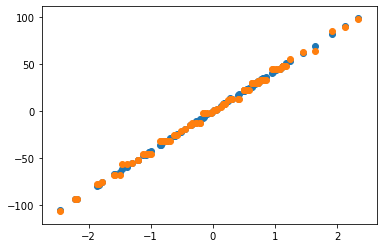

2.088124604494929


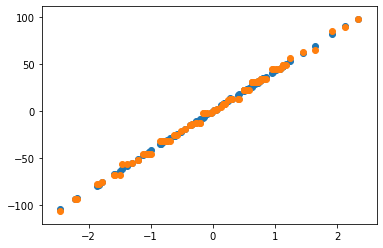

2.0559666595350707


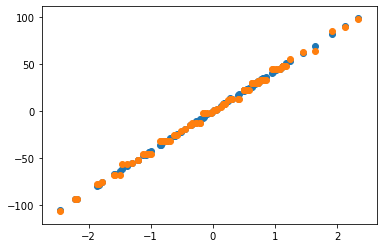

2.0289375734204858


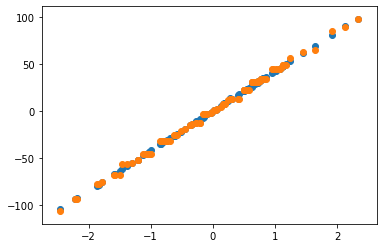

2.0012117862284726


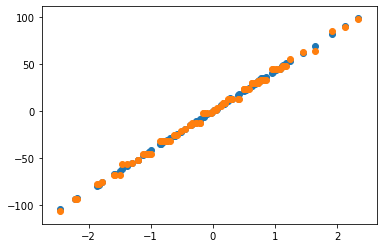

1.9761611273611728


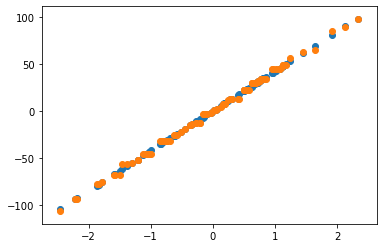

1.9475706375129733


In [93]:
gradient_boost_mse(X,y,100)

In [10]:
y_hat = np.array([y.mean()]*len(y)) 

In [11]:
y_hat[0]

22.532806324110677

In [12]:
def loss_gradient(y, y_hat): 
    return -(y-y_hat) 

In [13]:
residuals = -loss_gradient(y, y_hat) 

In [14]:
residuals[:3]

array([ 1.46719368, -0.93280632, 12.16719368])

In [15]:
regressor.fit(X, residuals)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=1,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [30]:
X.shape

(506, 13)

In [16]:
regressor.tree_.feature

array([ 5, -2, -2], dtype=int64)

In [17]:
regressor.tree_.threshold

array([ 6.94099998, -2.        , -2.        ])

In [18]:
leaf1_index = np.where(X[:,5] >= 6.94099998) 
leaf2_index = np.where(X[:,5] < 6.94099998)

In [19]:
leaf1_output = residuals[leaf1_index].mean() 
leaf2_output = residuals[leaf2_index].mean()

In [20]:
compute_loss(residuals, [ leaf1_output if ix in list(leaf1_index)[0] else leaf2_output for ix in range(len(X))])

23.09954583855424

In [27]:
np.unique(regressor.predict(X))

array([-2.59908539, 14.70535157])

In [28]:
leaf1_output,leaf2_output

(14.705351570626162, -2.599085393878118)

In [56]:
from sklearn.datasets import make_blobs,make_classification
from matplotlib import pyplot
from pandas import DataFrame
# generate 2d classification dataset
X, y = make_blobs(n_samples=100, centers=2, n_features=2)

In [57]:
df = DataFrame(dict(x=X[:,0], label=y))

In [58]:
df

,x,label
0,3.711986,0
1,4.499777,0
2,-9.192745,1
3,3.853321,0
4,-9.120401,1
...,...,...
95,3.445336,0
96,-10.336053,1
97,5.237517,0
98,-7.988514,1


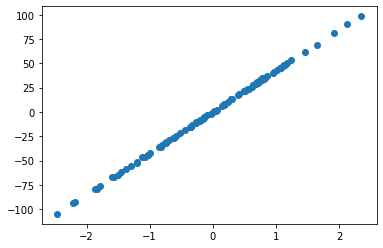

In [89]:
from sklearn.datasets import make_regression
from matplotlib import pyplot
# generate regression dataset
X, y = make_regression(n_samples=100, n_features=1, noise=0.5)
# plot regression dataset
pyplot.scatter(X,y)
pyplot.show()